# Imports

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

#Library created to ease process
import data_loaders

2024-02-24 21:36:02.361161: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Loads Data

In [2]:
data_handler = data_loaders.DataHandler('./dataset')

Found 4802 validated image filenames belonging to 11 classes.
Found 687 validated image filenames belonging to 11 classes.
Found 1373 validated image filenames belonging to 11 classes.


# Visualization of Data

Number of classes: 11
All class labels: ['rain' 'glaze' 'rime' 'rainbow' 'fogsmog' 'frost' 'sandstorm' 'hail'
 'snow' 'dew' 'lightning']


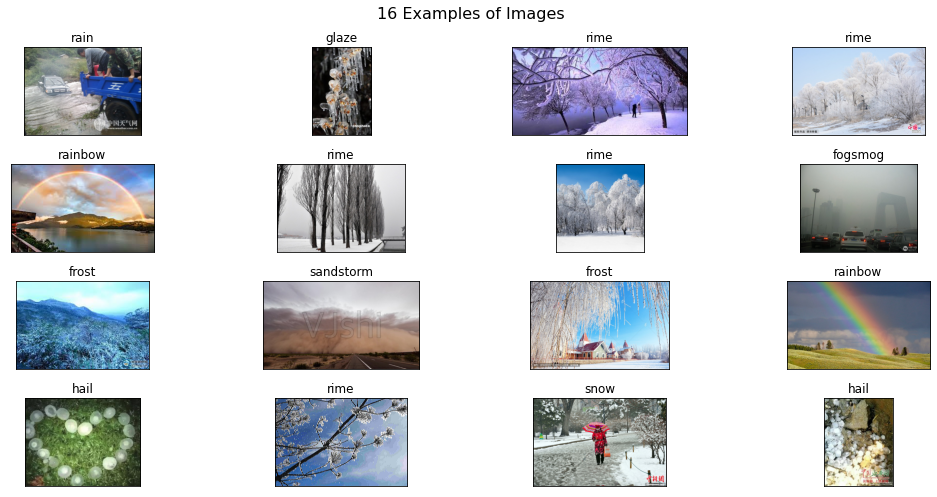

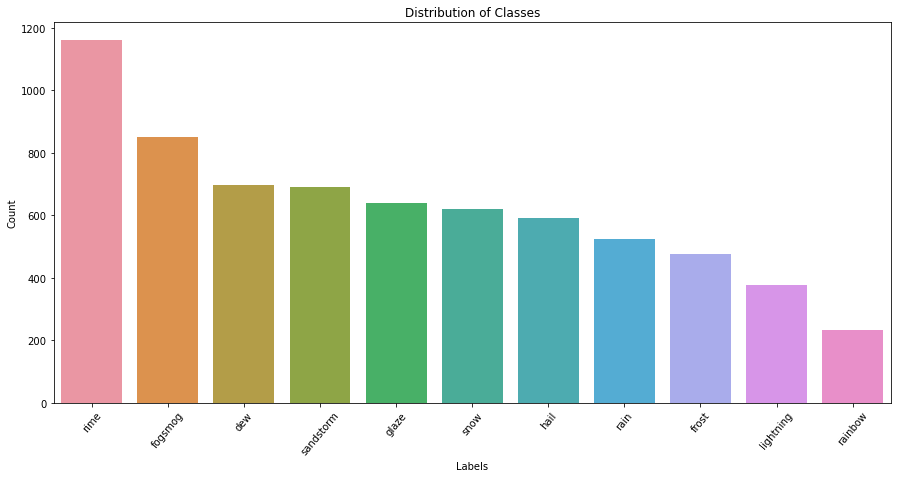

In [3]:
data_handler.plot_data()

# Traditional ML Attempt w/ Random Forest

## Loads split data

In [4]:
train_df, val_df, test_df = data_handler.get_split_data()

y_train_rf = train_df['Labels']
y_val_rf = val_df['Labels']
y_test_rf = test_df['Labels']


X_train_rf, X_val_rf, X_test_rf = data_handler.preprocess_RF(img_size=[100, 100], use_grayscale=True)


2024-02-24 21:36:09.823583: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-24 21:36:17.055023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-24 21:36:18.300501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-24 21:36:30.877206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


## Trains and evaluates grayscale RF

In [5]:
'''
RF = RandomForestClassifier(n_estimators=100, random_state=7)
RF.fit(X_train_rf, y_train_rf)

#save
joblib.dump(RF, "saved_models/RF_models/RandomForestGrayscale.joblib")
'''



#Ran the above code on first run, then loaded in after to have consistent model in analysis
# load
RF = joblib.load("./saved_models/RF_models/RandomForestGrayscale.joblib")

Classification Report:


,precision,recall,f1-score,support
dew,0.43,0.53,0.47,140
fogsmog,0.55,0.71,0.62,170
frost,0.53,0.21,0.30,95
glaze,0.55,0.44,0.49,128
hail,0.53,0.48,0.51,118
lightning,0.69,0.66,0.68,76
rain,0.50,0.35,0.41,105
rainbow,0.75,0.13,0.22,46
rime,0.47,0.66,0.55,232
sandstorm,0.42,0.42,0.42,139


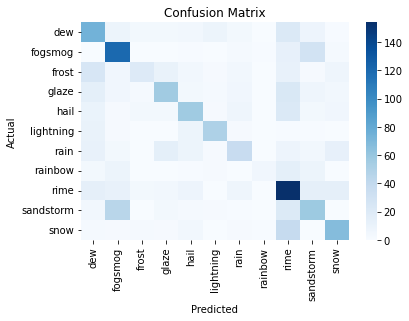

In [6]:
data_handler.evaluate_RF(RF, X_test_rf, y_test_rf)

## Loads data_handler with all 3 channels

In [7]:
X_train_rf_rgb, X_val_rf_rgb, X_test_rf_rgb = data_handler.preprocess_RF(img_size=[100, 100], use_grayscale=False)

2024-02-24 21:36:58.318524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-24 21:36:59.438056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-24 21:37:10.585100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


## Trains and evaluates RGB RF

In [8]:
'''
RF_rgb = RandomForestClassifier(n_estimators=100, random_state=7)
RF_rgb.fit(X_train_rf_rgb, y_train_rf)

# save
joblib.dump(RF_rgb, "./saved_models/RF_models/RandomForestRGB.joblib")
'''


#Ran the above code on first run, then loaded in after to have consistent model in analysis
# load
RF_rgb = joblib.load("./saved_models/RF_models/RandomForestRGB.joblib")

Classification Report:


,precision,recall,f1-score,support
dew,0.64,0.75,0.69,140
fogsmog,0.64,0.86,0.73,170
frost,0.44,0.20,0.28,95
glaze,0.50,0.41,0.45,128
hail,0.59,0.61,0.60,118
lightning,0.83,0.82,0.82,76
rain,0.54,0.43,0.48,105
rainbow,0.71,0.22,0.33,46
rime,0.60,0.76,0.67,232
sandstorm,0.76,0.65,0.70,139


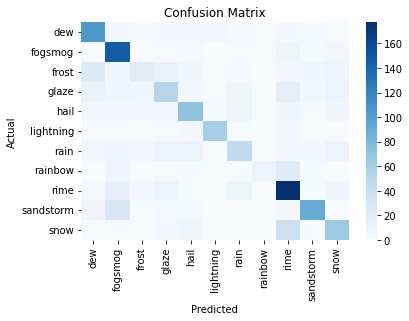

In [9]:
data_handler.evaluate_RF(RF_rgb, X_test_rf_rgb, y_test_rf)